# CM50268 :: Final project

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 10, 2022. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


**Please submit your completed workbook using Moodle before 8pm on May 10, 2022 along with your individual report**. The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 will be awarded based only on the content of the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
from scipy.stats.stats import pearsonr
import hmc_Lab as hmc
from pylab import rcParams

# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 

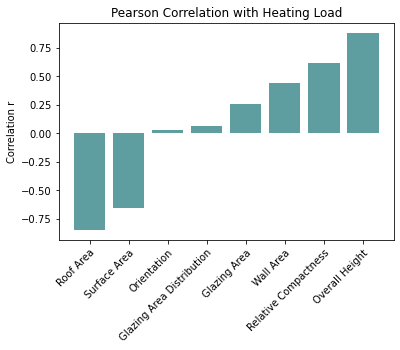

<Figure size 288x288 with 0 Axes>

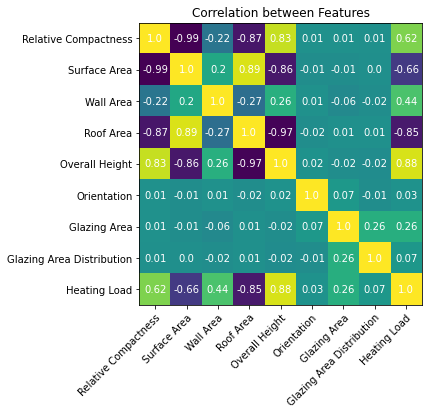

<Figure size 288x288 with 0 Axes>

In [2]:
#### **** YOUR CODE HERE **** ####  
 # Read the CSV file and extract Bag of Words Features
    
#train data
with open("ee-train.csv", encoding="utf-8", mode="r") as file:
    raw_train_data = file.read().split("\n")

headers = raw_train_data[0].split(",")[:-1]
raw_train_data = raw_train_data[1:]
X_train = np.array([entry.split(",")[:-1] for entry in raw_train_data[:-1]]).astype(np.float64)
y_train = np.array([entry.split(",")[-1] for entry in raw_train_data[:-1]]).astype(np.float64)

means = [np.mean(X_train.T[i]) for i in range(X_train.shape[1])]
stds = [np.std(X_train.T[i]) for i in range(X_train.shape[1])]


for row in range(384):
    for col in range(9):
        if stds[col] != 0:
            X_train[row][col] = (X_train[row][col]-means[col])/stds[col]


            
#test data
with open("ee-test.csv", encoding="utf-8", mode="r") as file:
    raw_test_data = file.read().split("\n")


raw_test_data = raw_test_data[1:]
X_test = np.array([entry.split(",")[:-1] for entry in raw_test_data[:-1]]).astype(np.float64)
y_test = np.array([entry.split(",")[-1] for entry in raw_test_data[:-1]]).astype(np.float64)




for row in range(384):
    for col in range(9):
        if stds[col] != 0:
            X_test[row][col] = (X_test[row][col]-means[col])/stds[col]

#### **** You can add extra cells to illustrate your results **** #### 

correlations = dict()
all_lists = []


for col_idx in range(1,len(headers)):
    col_data = X_train.T[col_idx]
    all_lists.append(col_data)
    r,p = pearsonr(col_data,y_train)
    correlations[headers[col_idx]] = r
    
correlations = dict(sorted(correlations.items(), key=lambda item: item[1]))

r_keys = (correlations.keys())
r_vals = [correlations[key] for key in r_keys]

fsz = (4,4)
fig,ax = plt.subplots()
plt.bar(r_keys,r_vals,color='CadetBlue')
plt.title("Pearson Correlation with Heating Load")
plt.ylabel("Correlation r")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.figure(figsize=fsz)
plt.show()


all_lists.append(y_train)
rcParams['figure.figsize'] = 6, 6
plt_headers = headers[1:]
plt_headers.append("Heating Load")

plt_y = plt_headers
plt_x = plt_headers

r_values = np.corrcoef(all_lists)

fig, ax = plt.subplots()
im = ax.imshow(r_values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(plt_x)))
ax.set_yticks(np.arange(len(plt_y)))
# ... and label them with the respective list entries
ax.set_xticklabels(plt_x)
ax.set_yticklabels(plt_y)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(plt_y)):
    for j in range(len(plt_x)):
        text = ax.text(j, i, round(r_values[i, j],2),
                       ha="center", va="center", color="w")

ax.set_title("Correlation between Features")
fig.tight_layout()
plt.figure(figsize=fsz)
plt.show()



In [3]:
# Check whether fixed variables are correctly defined ..
try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [4]:
def RMSE(X_test,W,y_test):
    rmse_total=0
    for idx in range(len(X_test)):
        y_pred = np.matmul(X_test[idx].T,W)
        rmse_total += (y_pred-y_test[idx])**2
    rmse = (rmse_total/len(X_test) )**0.5
    return rmse

def MAE(X_test,W,y_test):
    mae_total=0
    for idx in range(len(X_test)):
        y_pred = np.matmul(X_test[idx].T,W)
        mae_total += abs(y_pred-y_test[idx])
    mae = mae_total/len(X_test) 
    return mae

In [5]:
# Least Squares
w = np.linalg.lstsq(X_train,y_train,rcond=None)[0]
print("LEAST SQUARES")
print("---------RMSE---------")
print("Test RMSE",RMSE(X_test,w,y_test))
print("Train RMSE",RMSE(X_train,w,y_train))
print("---------MAE---------")
print("Test MAE",MAE(X_test,w,y_test))
print("Train MAE",MAE(X_train,w,y_train))


LEAST SQUARES
---------RMSE---------
Test RMSE 2.8435880167333685
Train RMSE 3.011551787650362
---------MAE---------
Test MAE 2.069010093808357
Train MAE 2.130679441406916


#  Task 2 : Type-2 maximum likelihood (Section 4.2 (a) in the specification doc)

###  **(6 marks)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, slide 11 and 12 we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters (slide 12).


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [6]:
## Compute log-likelihood

def compute_log_marginal(X, y, alph, beta):
    #### ** YOUR CODE HERE ** ####     
    return stats.multivariate_normal.logpdf(y.flatten() ,cov= (1/beta)*np.identity(X.shape[0]) + X.dot(X.T) / alph)
    
# compute_log_marginal(X_train, y_train, 0.1, 0.1)


Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms.

In [7]:
#### **** YOUR CODE HERE **** ####   
log_prob_y = []
# prob_Y = []
log_alphs = np.linspace(-5,0,100)
log_betas = np.linspace(-5,0,100)

max_prob = -math.inf
max_alph = 0
max_beta = 0


for log_alph in log_alphs:
    alph = np.exp(log_alph)
    alph_log_probs = []

    for log_beta in log_betas:
        beta = np.exp(log_beta)
        log_prob = compute_log_marginal(X_train, y_train, alph, beta)

        if log_prob  > max_prob:
            max_prob =log_prob 
            max_alph = alph
            max_beta = beta
        alph_log_probs.append(log_prob)

    log_prob_y.append(alph_log_probs)

 

log_prob_y = np.array(log_prob_y).T



# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [8]:
#### **** YOUR CODE HERE **** ####
print("most probable α: ",max_alph)
print("most probable log α: ",np.log(max_alph))

print("most probable β: ",max_beta)
print("most probable log β: ",np.log(max_beta))

print("Log Likelihood P(α,β):", max_prob)

most probable α:  0.01174362845702136
most probable log α:  -4.444444444444445
most probable β:  0.10836802322189586
most probable log β:  -2.2222222222222223
Log Likelihood P(α,β): -1001.4576252255198


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

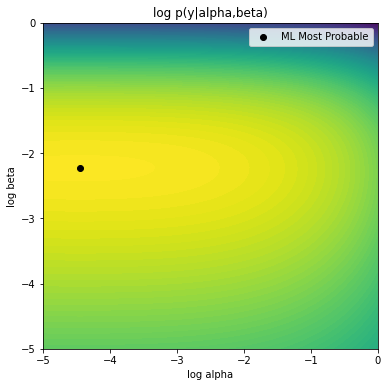

In [9]:
#### **** YOUR CODE HERE **** ####   
fig, ax = plt.subplots()
CS = ax.contourf(log_alphs, log_betas, log_prob_y,levels=100)
# ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('log p(y|alpha,beta)')
plt.xlabel("log alpha")
plt.ylabel("log beta")
plt.scatter([np.log(max_alph)], [np.log(max_beta)],label='ML Most Probable',color="black")
plt.legend()
plt.show()



Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [10]:
def compute_posterior(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####
    PHI2 = np.matmul(X.T, X)
    PHI = X
    s2 = 1/beta
    
    penaltyI = alph* s2* np.identity(PHI2.shape[0])
    term1 = np.linalg.inv((PHI2+penaltyI))
    term2 = np.matmul(PHI.T,y)
    Mu = np.matmul(term1,term2)
    SIGMA = s2*term1

    return Mu, SIGMA

Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [11]:
#### **** YOUR CODE HERE **** ####
        
Mu, Sig = compute_posterior(X_train, y_train, max_alph, max_beta)
print("MAX LIKELIHOOD")
print("---------RMSE---------")
print("Test RMSE",RMSE(X_test,Mu,y_test))
print("Train RMSE",RMSE(X_train,Mu,y_train))
print("---------MAE---------")
print("Test MAE",MAE(X_test,Mu,y_test))
print("Train MAE",MAE(X_train,Mu,y_train))


MAX LIKELIHOOD
---------RMSE---------
Test RMSE 2.8434354488164026
Train RMSE 3.0116945897527985
---------MAE---------
Test MAE 2.0668415386163326
Train MAE 2.1301788157336974


# Task 3: Variational Inference (Section 4.2 (b) in the specification doc)

###  **(4 marks)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

The corresponding derivations should be completed in your report.



In [12]:
def VI(X_train, Y_train):
    #### **** YOUR CODE HERE **** ####
    (rows,cols) = X_train.shape
    PHI = X_train
    
    #   arbitrary initial values
    a0 = 0.0001 
    b0 = 0.0001
    c0 = 0.0001 
    d0 = 0.0001
    
    an = a0 + (cols/2)
    cn = c0 + (rows/2)
    
    iterations =0
    
    alpha_graphs = []
    beta_graphs = []
#         plot alpha
    alpha_x = np.linspace (-2000, 6000, 200) 
    alpha_y = stats.gamma.pdf(alpha_x, a=an, scale=b0)
    alpha_graphs.append(alpha_y)
    # plt.plot(alpha_x, alpha_y)
    # plt.title("alpha distribution - Iteration "+str(iterations))
    # plt.show()

#         plot beta
    beta_x = np.linspace (200000, 500000, 400) 
    beta_y = stats.gamma.pdf(beta_x, a=cn, scale=d0)
    beta_graphs.append(beta_y)
    # plt.plot(beta_x, beta_y)
    # plt.title("beta distribution - Iteration "+str(iterations))
    # plt.show()
        
    alph = a0/b0
    beta = c0/d0
    
    #plot convergence 
    alphas = []
    betas = []
    epsilon = 1e-6
    converged = False
    #change to until converged 
#     while not converged:
    
    while not converged:  
        
        iterations +=1 
        alphas.append(alph)
        betas.append(beta)
        
        if len(alphas) >2:
            if abs(alphas[len(alphas)-1] - alphas[len(alphas)-2]) < epsilon and abs(betas[len(alphas)-1] - betas[len(alphas)-2]) < epsilon:
                print("Converged in ",iterations," iterations")
                converged = True
          
        PHI2 = np.matmul(PHI.T, PHI)
        term1 = PHI2*beta
        term2 = alph * np.identity(PHI2.shape[0])

        sig_n = np.linalg.inv(term1+term2) 
        mu_n = np.matmul(sig_n, PHI.T).dot(Y_train)*beta
        

        w_t_w = np.matmul(mu_n.T, mu_n)+np.matrix.trace(sig_n)
        bn = b0 + (w_t_w/2)
        
        w_t_w_beta =  np.sum(((Y_train-np.matmul(PHI,mu_n))**2))
        dn = d0+(w_t_w_beta/2)
        
        alph = an/bn
        beta = cn/dn
        
#         plot alpha
        alpha_x = np.linspace (-2000, 6000, 200) 
        alpha_y = stats.gamma.pdf(alpha_x, a=an, scale=bn)
        alpha_graphs.append(alpha_y)
        # plt.plot(alpha_x, alpha_y)
        # plt.title("alpha distribution - Iteration "+str(iterations))
        # plt.show()
        
#         plot beta
        beta_x = np.linspace (200000, 500000, 400) 
        beta_y = stats.gamma.pdf(beta_x, a=cn, scale=dn)
        beta_graphs.append(beta_y)
        # plt.plot(beta_x, beta_y)
        # plt.title("beta distribution - Iteration "+str(iterations))
        # plt.show()

    alpha_x = np.linspace (-2000, 6000, 200) 
    opacity_c = 1/len(alpha_graphs)
    opacity = opacity_c
    for i in range(len(alpha_graphs)-1):
        plt.plot(alpha_x,alpha_graphs[i],color='k', linestyle='dashed',alpha=opacity)
        opacity += opacity_c
    plt.plot(alpha_x,alpha_graphs[-1],color='CadetBlue')
    plt.title("Approximation of the Gamma Distribution of Alpha")
    plt.xlabel("α")
    plt.ylabel("P(α)")
    plt.show()

    opacity = opacity_c
    beta_x = np.linspace (200000, 500000, 400) 
    for i in range(len(beta_graphs)-1):
        plt.plot(beta_x,beta_graphs[i],color='k', linestyle='dashed',alpha=opacity)
        opacity += opacity_c
    plt.plot(beta_x,beta_graphs[-1],color='CadetBlue')
    plt.title("Approximation of the Gamma Distribution of Beta")
    plt.xlabel("β")
    plt.ylabel("P(β)")
    plt.show()
    
    plt.plot(np.log(alphas),label="log(α)")
    plt.plot(np.log(betas),label="log(β)")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title("Change in Approximation of α and β  with Increasing Iterations of Variational Inference")
    plt.legend()
    plt.show()

    return an,bn,cn,dn, mu_n, sig_n

Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 


Converged in  7  iterations


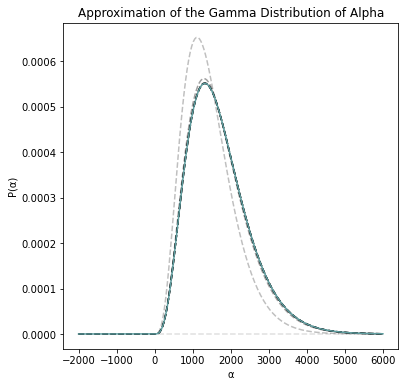

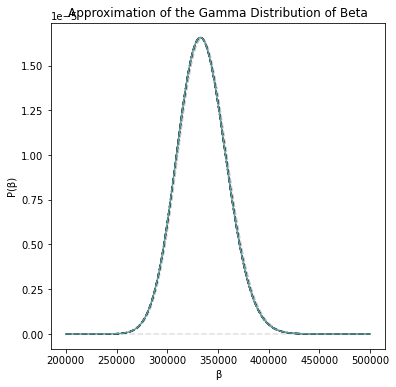

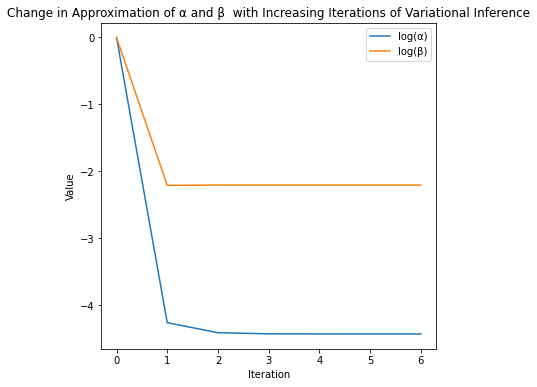

Expectation of α: 0.0119243978828159
Expectation of logα: -4.429168735489549
Expectation of β: 0.11024997365938524
Expectation of logβ: -2.2050050035723507


In [13]:
Y_train = y_train
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, Y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####
exp_alpha = an/bn
exp_beta = cn/dn
print("Expectation of α:",exp_alpha)
print("Expectation of logα:",np.log(exp_alpha))
print("Expectation of β:",exp_beta)
print("Expectation of logβ:",np.log(exp_beta))
# alpha: -4.4
# beta: -2.2

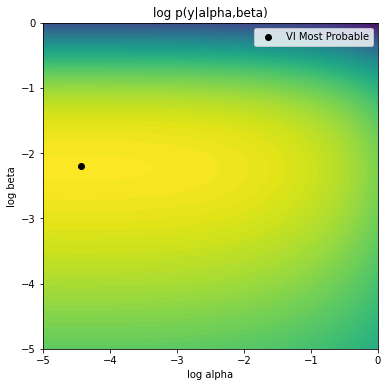

In [14]:
fig, ax = plt.subplots()
CS = ax.contourf(log_alphs, log_betas, log_prob_y,levels=100)
ax.set_title('log p(y|alpha,beta)')
plt.xlabel("log alpha")
plt.ylabel("log beta")
plt.scatter([np.log(exp_alpha)], [np.log(exp_beta)],label='VI Most Probable',color="black")
plt.legend()
plt.show()

In [15]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [16]:
#### **** YOUR CODE HERE **** ####
print("VARIATIONAL INFERENCE")
print("---------RMSE---------")
print("Test RMSE",RMSE(X_test,mu_n,y_test))
print("Train RMSE",RMSE(X_train,mu_n,y_train))
print("---------MAE---------")
print("Test MAE",MAE(X_test,mu_n,y_test))
print("Train MAE",MAE(X_train,mu_n,y_train))

VARIATIONAL INFERENCE
---------RMSE---------
Test RMSE 2.8434354233563433
Train RMSE 3.0116940672833237
---------MAE---------
Test MAE 2.0668452343520967
Train MAE 2.130179205126918


# Task 4: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [17]:
def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####
    dist = stats.multivariate_normal(cov=covar) 
    neglgp = -dist.logpdf(x)
    
    return neglgp

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    g  = (np.linalg.inv(covar)).dot(x)
    
    return g


## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

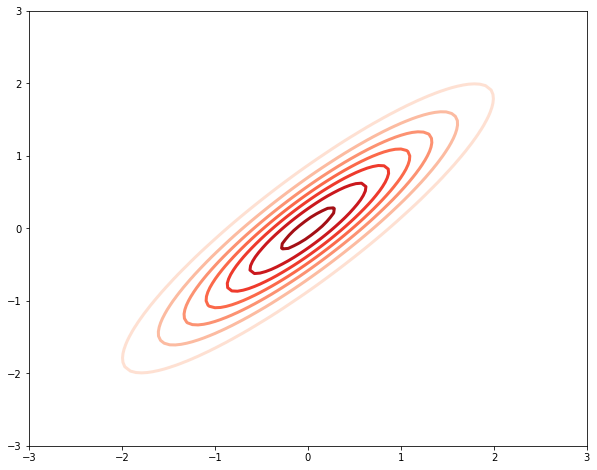

In [18]:

#### **** YOUR CODE BELOW **** ####

covar = np.array([[1,0.9],[0.9,1]]) 

#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [19]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [20]:
# Initialise the state for the first time step
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)

Calc.         Numeric       Delta         Acc.
    -2.47597      -2.47597  -3.855849e-11  11
     2.37644       2.37644  -5.969891e-11  11


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
    -2.47597      -2.47597  -3.855849e-11  11
     2.37644       2.37644  -5.969891e-11  11
|----------|  0% accepted [ 4 secs to go ]
|#---------| 91% accepted [ 3 secs to go ]
|##--------| 90% accepted [ 3 secs to go ]
|###-------| 90% accepted [ 3 secs to go ]
|####------| 90% accepted [ 2 secs to go ]
|#####-----| 90% accepted [ 2 secs to go ]
|######----| 90% accepted [ 2 secs to go ]
|#######---| 90% accepted [ 1 secs to go ]
|########--| 90% accepted [ 1 secs to go ]
|#########-| 90% accepted [ 0 secs to go ]
|##########| 90% accepted [ 0 secs to go ]
HMC: R=10000 / L=20 / eps=0.39 / Accept=90.3%


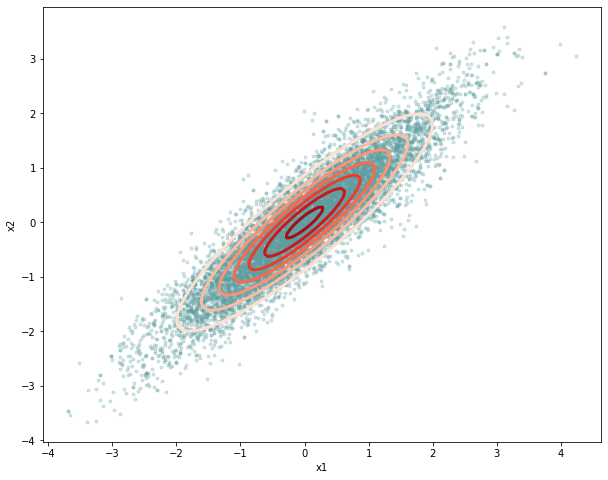

In [21]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####


R= 10000
L = 20
eps = 0.39
burn = int(R/10) 

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])
# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [22]:
#### **** YOUR CODE HERE **** ####
# Mu, Sig = compute_posterior(X_train, y_train, S[-1][0], S[-1][1])
# print(RMSE(X_test,Mu,y_test))
# print(RMSE(X_train,Mu,y_train))
#### **** You can add extra figures to support the individual report **** ####

# Task 5: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(8 marks)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [23]:
def energy_func_lr(hps, x, y):
    
    alpha = np.max([1e-35,hps[0]]) # adding small value if zero to avoid divide by zero errors
    beta = np.max([1e-35,hps[1]])
    w = hps[2:]

    N = x.shape[0] # beta uses N as sum of logp for N ys
    M = x.shape[1] # alpha uses M as sum of logp for M weights

    a =  M/2 * (-np.log(2 * np.pi) + np.log(alpha)) - 0.5 * alpha * w.T@w
    b =  N/2 * (-np.log(2 * np.pi) + np.log(beta)) - 0.5 * beta * (y - x@w).T @ (y - x@w)
    lgp = a + b
    return - lgp

In [24]:
def energy_grad_lr(hps, x, y):

    alpha = np.max([1e-35,hps[0]])
    beta = np.max([1e-35,hps[1]])
    w = hps[2:]
    N = x.shape[0] # beta uses N as sum of logp for N ys
    M = x.shape[1] # alpha uses M as sum of logp for M weights
    
    g_alpha =  - M/(2*alpha) + 0.5 * (w.T@w)
    g_beta = - N/(2*beta) + 0.5 * (y - x@w).T @ (y - x@w)
    g_weights = - beta*x.T @ (y-x@w) + alpha * w

    g = np.zeros(len(hps))
    g[0] = g_alpha
    g[1] = g_beta
    g[2:] = g_weights
    return g

In [25]:
np.random.seed(seed=2) 

#### ** YOUR CODE HERE ** ####

R = 200000
L = 20
eps = 2.7e-4
burn = int(R/10) 

# Chose to initialise alpha, beta and all weights to arbitrary value 1
x0 = np.ones(11)

#### you can adjust the hyper-parameters. 

S, *_ = hmc.sample(x0, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, y_train])

Calc.         Numeric       Delta         Acc.
           0             0   0.000000e+00  16
      109340        109340  -1.065996e-05  11
    -8416.55      -8416.55   6.146447e-06  10
    -2460.78      -2460.78  -1.282367e-05   9
     2618.41       2618.41  -5.583635e-06   9
    -1331.43      -1331.43  -2.971042e-06   9
     3201.95       3201.95   1.340073e-05   9
    -3313.14      -3313.14  -5.644579e-06   9
     312.038       312.038   1.106601e-06   9
    -504.094      -504.094  -8.840482e-06   8
     216.123       216.123   2.364439e-06   8
|----------|  0% accepted [ 129 secs to go ]


C:\Users\Hadi\hmc_Lab.py:121: RuntimeWarning: overflow encountered in exp
  if np.random.uniform() < np.exp(current_U-proposed_U+current_K-proposed_K):


|#---------| 27% accepted [ 116 secs to go ]
|##--------| 47% accepted [ 103 secs to go ]
|###-------| 63% accepted [ 90 secs to go ]
|####------| 73% accepted [ 77 secs to go ]
|#####-----| 78% accepted [ 64 secs to go ]
|######----| 82% accepted [ 51 secs to go ]
|#######---| 84% accepted [ 39 secs to go ]
|########--| 86% accepted [ 26 secs to go ]
|#########-| 88% accepted [ 13 secs to go ]
|##########| 89% accepted [ 0 secs to go ]
HMC: R=200000 / L=20 / eps=0.00027 / Accept=89.0%


## Print out the RMSE and plot figures for your report

HAMILTONIAN MONTE CARLO
---------RMSE---------
Train RMSE: 3.047722572590318
Test RMSE: 2.885940340018238
---------MAE---------
Train MAE: 2.182226543104184
Test MAE: 2.120546988735786
Alpha


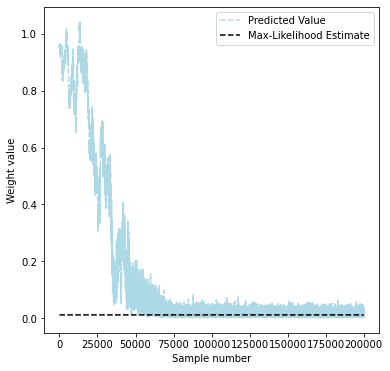

Beta


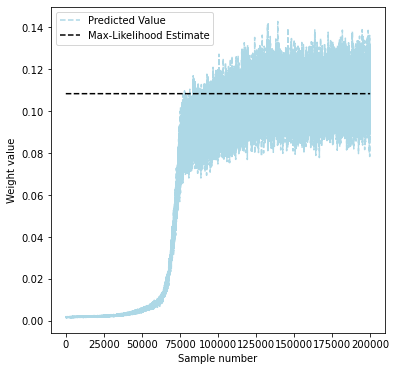

const


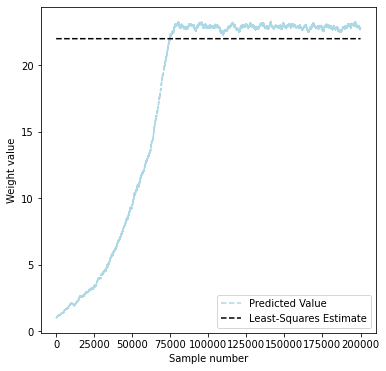

Relative Compactness


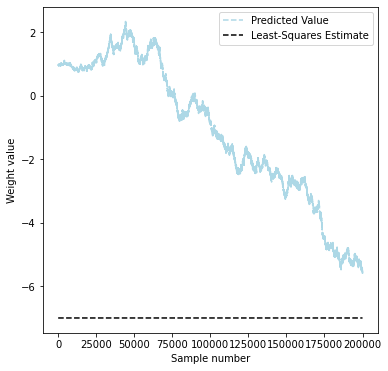

Surface Area


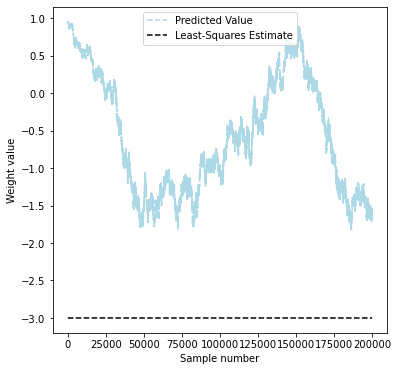

Wall Area


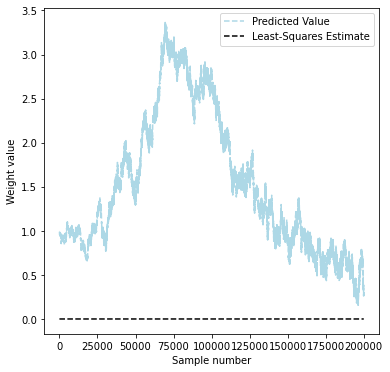

Roof Area


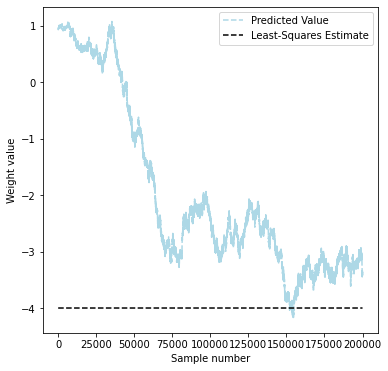

Overall Height


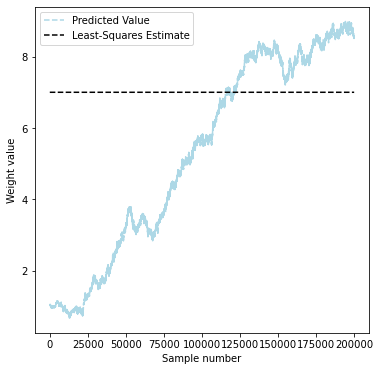

Orientation


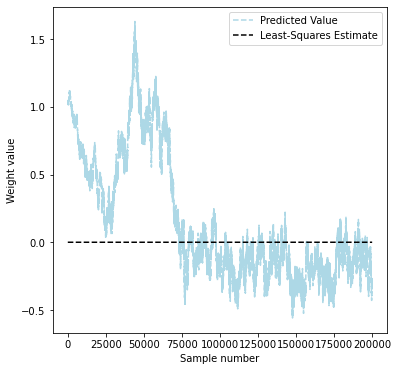

Glazing Area


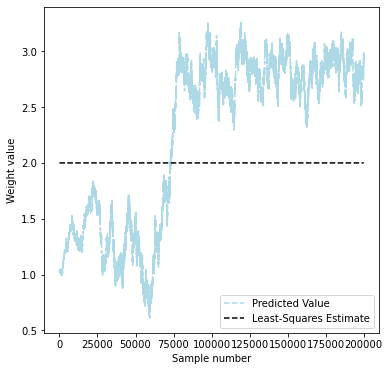

Glazing Area Distribution


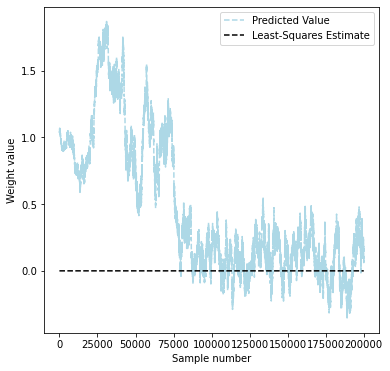

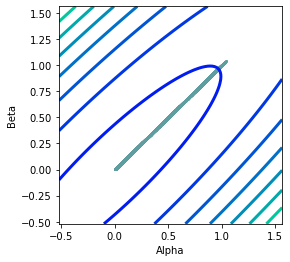

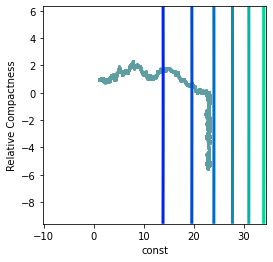

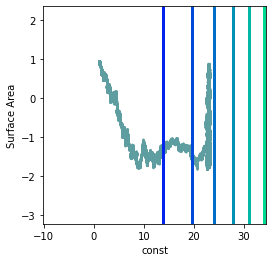

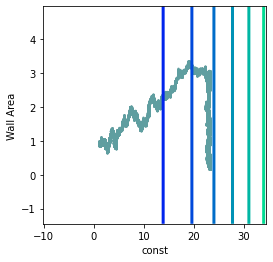

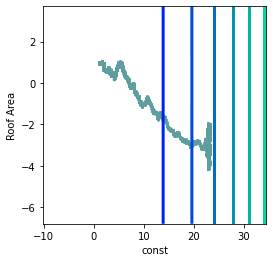

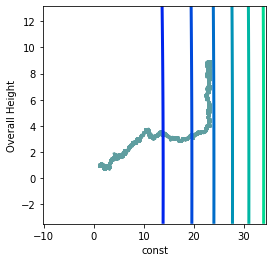

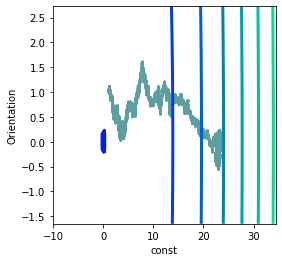

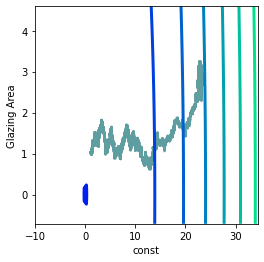

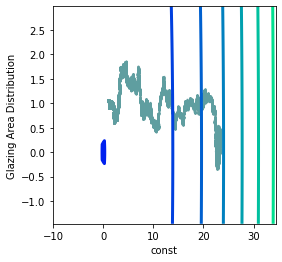

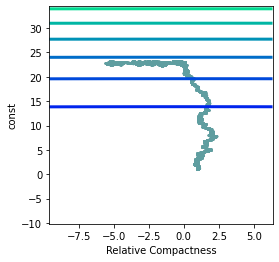

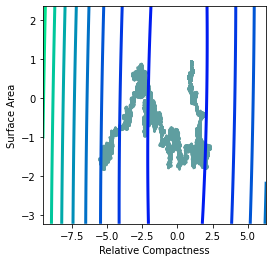

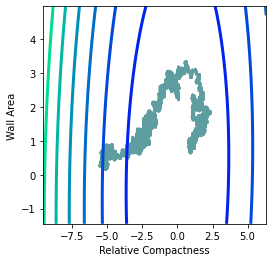

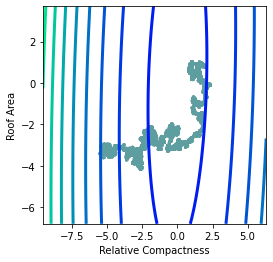

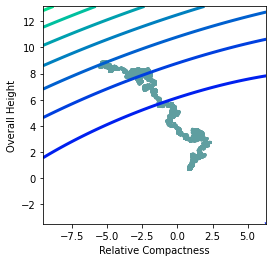

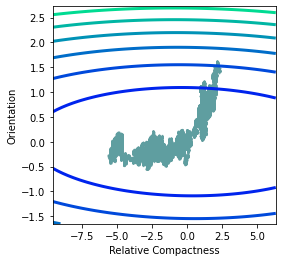

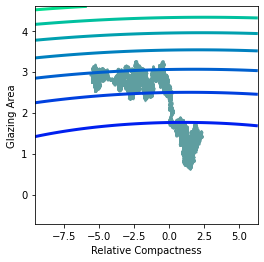

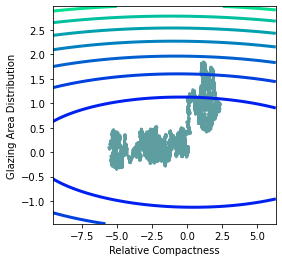

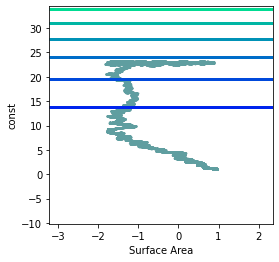

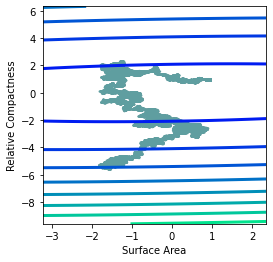

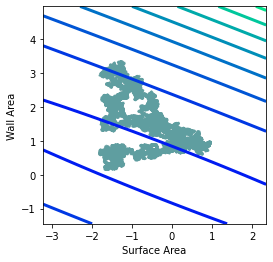

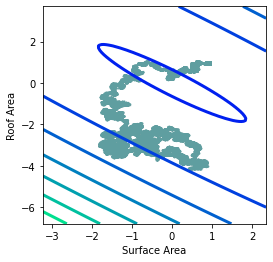

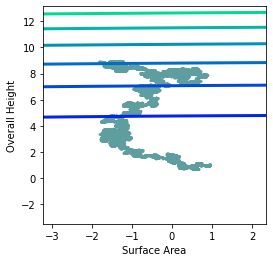

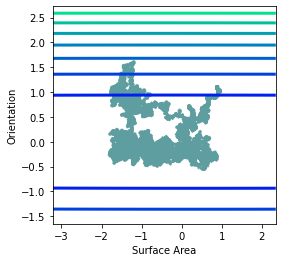

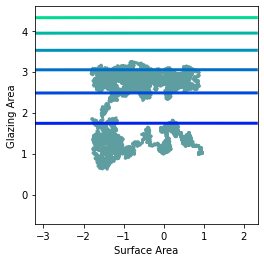

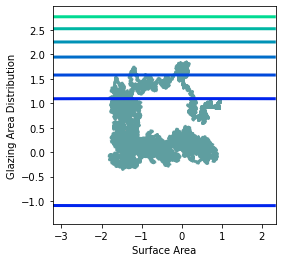

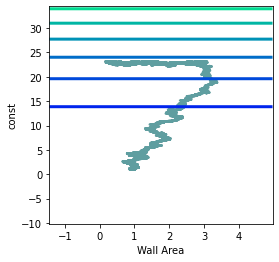

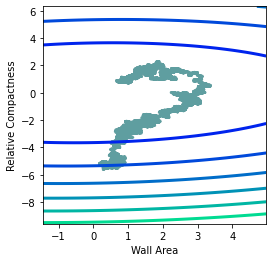

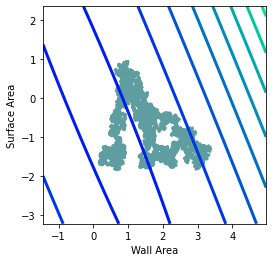

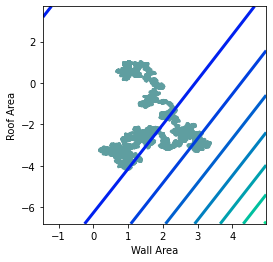

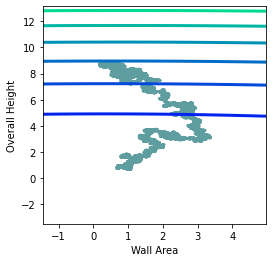

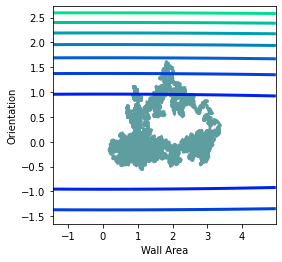

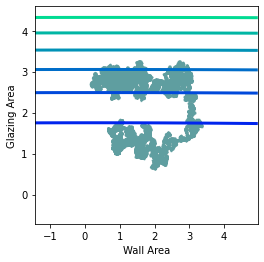

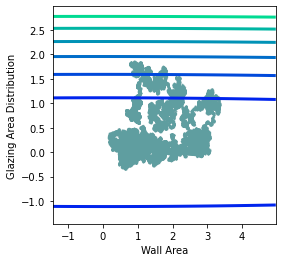

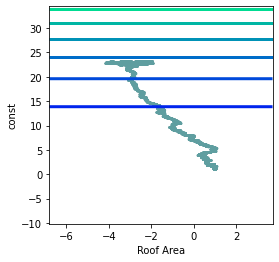

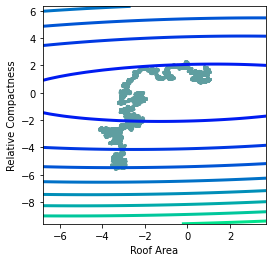

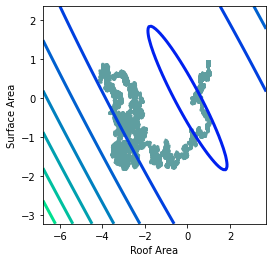

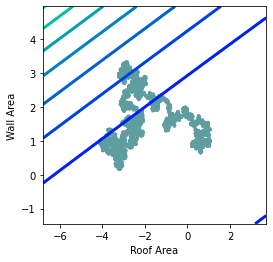

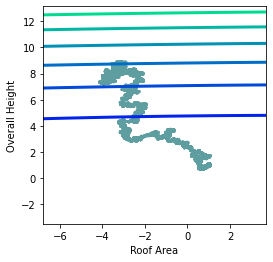

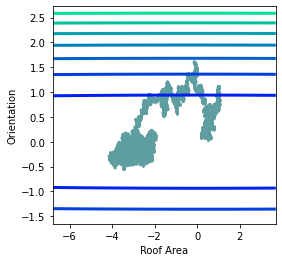

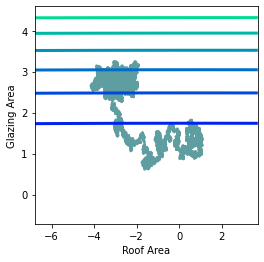

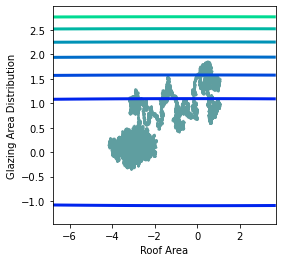

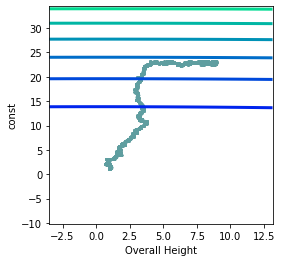

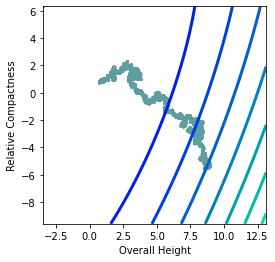

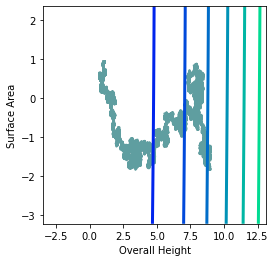

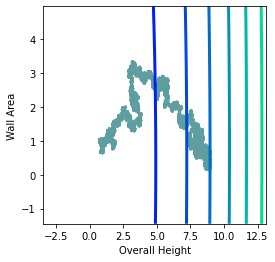

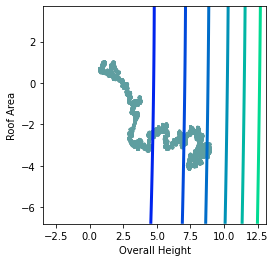

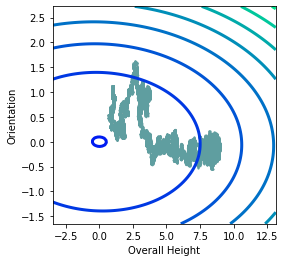

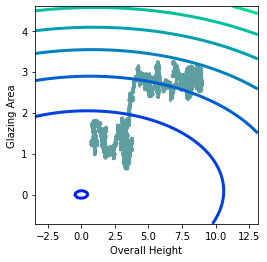

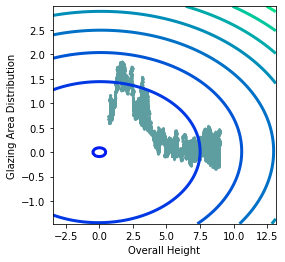

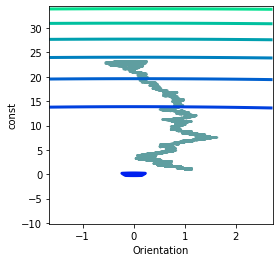

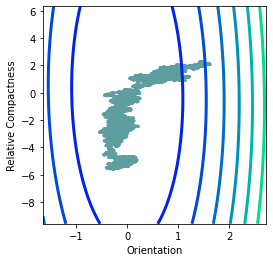

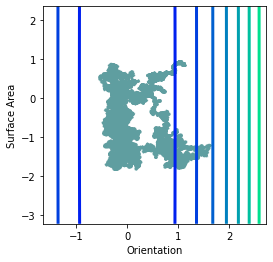

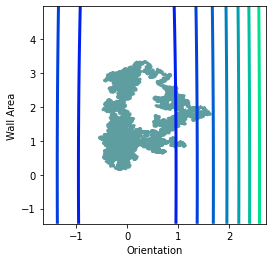

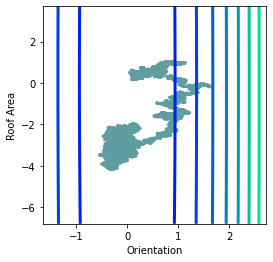

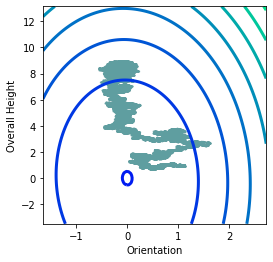

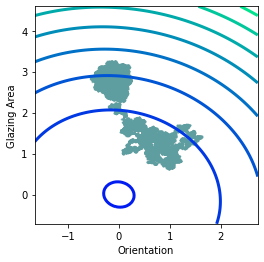

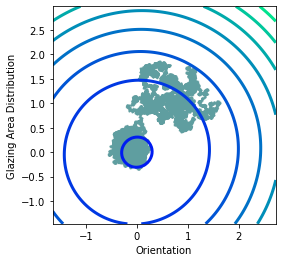

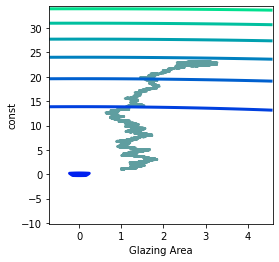

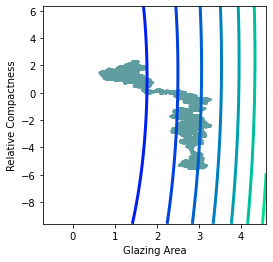

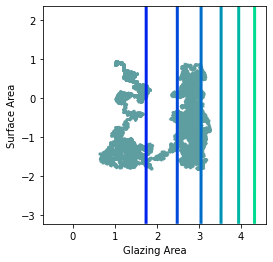

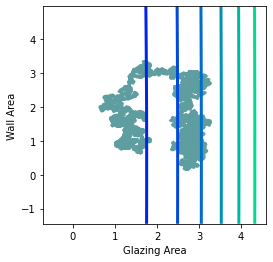

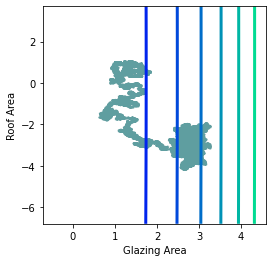

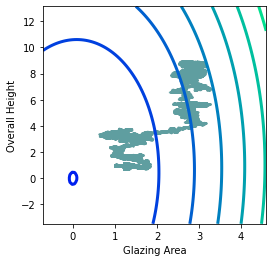

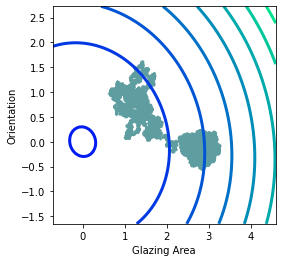

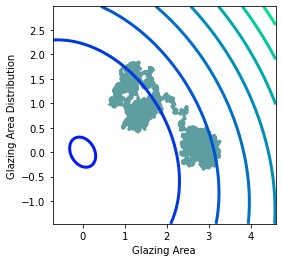

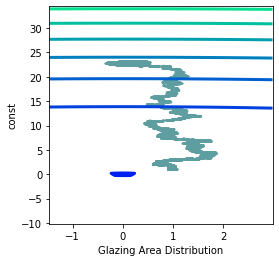

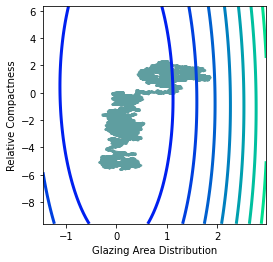

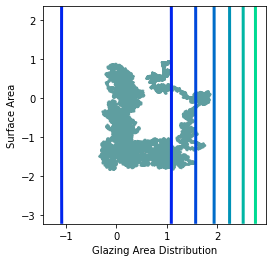

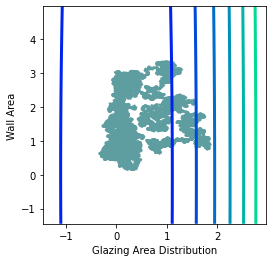

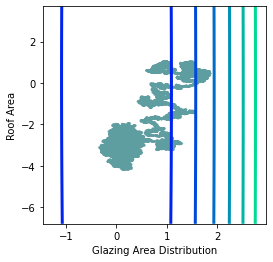

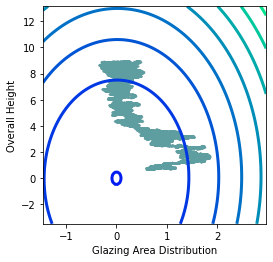

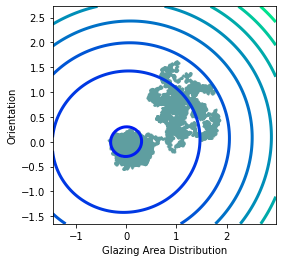

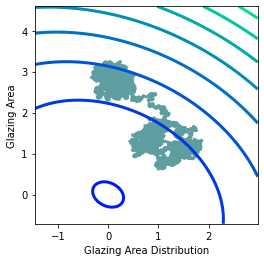

In [26]:
# train_rmse, test_rmse = calc_RMSE(X_train,y_train,X_test,y_test,S[-1][2:])
train_rmse = RMSE(X_train,S[-1][2:],y_train)
test_rmse = RMSE(X_test,S[-1][2:],y_test)
print("HAMILTONIAN MONTE CARLO")
print("---------RMSE---------")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print("---------MAE---------")
train_mae = MAE(X_train,S[-1][2:],y_train)
test_mae = MAE(X_test,S[-1][2:],y_test)
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (4,4)
gsz = 100

mu,sigma = compute_posterior(X_train,y_train,max_alph,max_beta)


##### CONVERGENCE GRAPHS #####
ls_est = np.linalg.lstsq(X_train,y_train,rcond=None)[0]

N = np.shape(S)[0]
for i in range(11):
    plt.plot(range(N),S[:,i],color='lightblue', linestyle='dashed',label=("Predicted Value"))
    if i == 0:
        print("Alpha")
        plt.plot(range(N),np.full(N,max_alph),color='black', linestyle='dashed',label="Max-Likelihood Estimate",)
    elif i == 1:
        print("Beta")
        plt.plot(range(N),np.full(N,max_beta),color='black', linestyle='dashed',label="Max-Likelihood Estimate",)
    else:
        plt.plot(range(N),np.full_like(range(N),ls_est[i-2]),color='black', linestyle='dashed',label="Least-Squares Estimate")
        print(headers[i-2])
    
    plt.xlabel("Sample number")
    plt.legend()
    plt.ylabel("Weight value")
    plt.show()



##### ALPHA AND BETA #####
plt.figure(figsize=fsz)
alph_data =S[:, 0]
alph_min = min(alph_data)
alph_max = max(alph_data)
alph_range = alph_max - alph_min

beta_data =S[:, 0]
beta_min = min(beta_data)
beta_max = max(beta_data)
beta_range = beta_max - beta_min

plt.scatter(alph_data, beta_data, color='CadetBlue',s=1, alpha=0.25)

covar = np.array([[1,0.9],[0.9,1]]) 

plt.xlabel("Alpha")
plt.ylabel("Beta")

# gx = np.linspace(alph_min - 5, alph_max + 5,gsz)
# gy = np.linspace(beta_min - 5, beta_max + 5,gsz)
gx = np.linspace(alph_min - 0.5 * alph_range, alph_max + 0.5 * alph_range, gsz)
gy = np.linspace(beta_min - 0.5 * beta_range, beta_max + 0.5 * beta_range, gsz)

GX, GY = np.meshgrid(gx, gy)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))
P = np.asarray([energy_func(g, covar) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='winter', linewidths=3, zorder=1);
plt.show()

##### WEIGHTS #####
S_w = S[2:,2:]
for w1 in range(9):
    covar = np.zeros(shape=(2,2))
    for w2 in range(9):
        if w1 != w2:
            plt.figure(figsize=fsz)
            w1_data =S_w[:, w1]
            w1_min = min(w1_data)
            w1_max = max(w1_data)
            w1_range = w1_max - w1_min

            w2_data =S_w[:, w2]
            w2_min = min(w2_data)
            w2_max = max(w2_data)
            w2_range = abs(w2_max - w2_min)

            plt.scatter(S_w[:, w1], S_w[:, w2], color='CadetBlue',s=1, alpha=0.25)

            covar = [[sigma[w1,w1],sigma[w1,w2]],[sigma[w2,w1],sigma[w2,w2]]]

            plt.xlabel(headers[w1])
            plt.ylabel(headers[w2])

            # gx = np.linspace(w1_min - 5, w1_max + 5,gsz)
            # gy = np.linspace(w2_min - 5, w2_max + 5,gsz)
            gx = np.linspace(w1_min - 0.5 * w1_range, w1_max + 0.5 * w1_range, gsz)
            gy = np.linspace(w2_min - 0.5 * w2_range, w2_max + 0.5 * w2_range, gsz)

            GX, GY = np.meshgrid(gx, gy)
            Gsz = GX.size
            G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))
            P = np.asarray([energy_func(g, covar) for g in G])
            plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='winter', linewidths=3, zorder=1);
            plt.show()

# Task 6: Gaussian Processes

###  **(3 marks)**

There's no restriction on the GP implementation, you could either use the sklearn package or the Tensorflow style, the latter of which may receive extra bonus mark depending on the quality of implementation.  

You only need to estimate the weights from $x0$ to $x8$ in this task, then calculate RMSE and plot supporting figures for your report. 

<font color=Red>  It is highly recommended that you impelment this part in a seperated file if your implementation contains too many extra libraries, as it may fool the auto-marker and incorrectly mark the rest of your notebook. 
<font>   
    
    


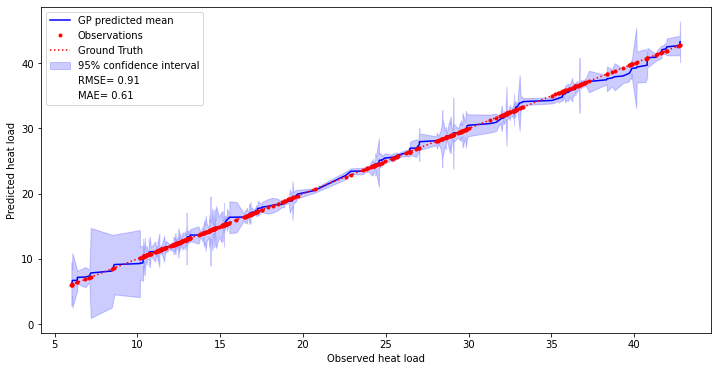

GAUSSIAN PROCESSES
---------RMSE---------
Train RMSE: 0.05881104524819617
Test RMSE: 0.9135357840805934
---------MAE---------
Train MAE: 0.030911722071961436
Test MAE: 0.6148373616713695


In [27]:
from sklearn import gaussian_process 
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel, RBF 

k0 = WhiteKernel(noise_level=0.1**2, noise_level_bounds=(0.6**2, 1.1**2)) 
 
k1 = ConstantKernel(constant_value=1) * ExpSineSquared(length_scale=1.0, periodicity=21, periodicity_bounds=(15, 30)) 

k2 = ConstantKernel(constant_value=10) *RBF(length_scale = 10, length_scale_bounds=(1e-5, 1e5)) 
 
    
gp1 = gaussian_process.GaussianProcessRegressor( 
    kernel=k2,  
    n_restarts_optimizer=20,  
    normalize_y=False, 
    alpha=0.01
)

gp1.fit(X_train, y_train)

#   test metrics
pred_mean_test, pred_std_test = gp1.predict(X_test, return_std = True)

test_rmse = (((pred_mean_test -y_test)**2).mean())**0.5 
test_mae = np.mean(np.abs(y_test - pred_mean_test))

#   train metrics
pred_mean_train, pred_std_train = gp1.predict(X_train, return_std = True)

train_rmse = (((pred_mean_train -y_train)**2).mean())**0.5 
train_mae = np.mean(np.abs(y_train - pred_mean_train))

sorted_pred = pred_mean_test.copy()
sorted_pred.sort()

sorted_y = y_test.copy()
sorted_y.sort()

ci = 1.96 * pred_std_test

plt.figure(figsize=[12,6]) 
plt.plot(sorted_y, sorted_pred, 'b-', label ='GP predicted mean')
plt.plot(sorted_y, sorted_y, 'r.', label = "Observations")
plt.plot(sorted_y, sorted_y, 'r:', label = "Ground Truth")
plt.fill_between(sorted_y, (sorted_pred-ci), (sorted_pred+ci), color='b', alpha=.2, label = '95% confidence interval')
plt.plot([], [], ' ', label="RMSE= %.2f"%test_rmse)
plt.plot([], [], ' ', label="MAE= %.2f"%test_mae)
plt.xlabel("Observed heat load")
plt.ylabel("Predicted heat load")
plt.legend(loc="upper left")
plt.show()


print("GAUSSIAN PROCESSES")
print("---------RMSE---------")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print("---------MAE---------")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

ML alpha:0.01174362845702136 beta:0.10836802322189586
VI alpha:0.0119243978828159 beta:0.11024997365938524
HMC alpha:0.025465520893954083 beta:0.0991105444863007
{'alpha': 0.01, 'copy_X_train': True, 'kernel__k1': 3.16**2, 'kernel__k2': RBF(length_scale=10), 'kernel__k1__constant_value': 10, 'kernel__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k2__length_scale': 10, 'kernel__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel': 3.16**2 * RBF(length_scale=10), 'n_restarts_optimizer': 20, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None}


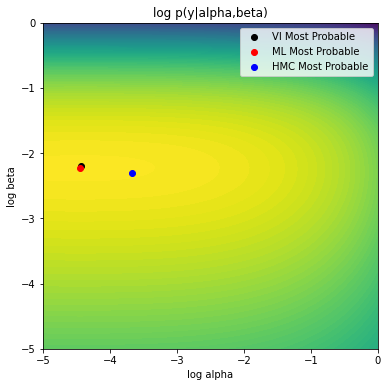

In [28]:
hmc_alph,hmc_beta = S[:,0][-1],S[:,1][-1]
print(f"ML alpha:{max_alph} beta:{max_beta}")
print(f"VI alpha:{exp_alpha} beta:{exp_beta}")
print(f"HMC alpha:{hmc_alph} beta:{hmc_beta}")
# print(f"GP alpha:{} beta:{}")

print(gp1.get_params())
fig, ax = plt.subplots()
CS = ax.contourf(log_alphs, log_betas, log_prob_y,levels=100)
ax.set_title('log p(y|alpha,beta)')
plt.xlabel("log alpha")
plt.ylabel("log beta")
plt.scatter([np.log(exp_alpha)], [np.log(exp_beta)],label='VI Most Probable',color="black")
plt.scatter([np.log(max_alph)], [np.log(max_beta)],label='ML Most Probable',color="red")
plt.scatter([np.log(hmc_alph)], [np.log(hmc_beta)],label='HMC Most Probable',color="blue")
# plt.scatter([np.log(hmc_alph)], [np.log(hmc_beta)],label='GP Most Probable',color="orange")
plt.legend()
plt.show()